<a href="https://colab.research.google.com/github/MDJubayer255/ml_Lab01/blob/main/222902009_CSE412_222D3_LabReport03_mlpFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Act=sigmoid, LR=0.01, Epochs=500 => Acc=0.50, Prec=0.50, Recall=0.50, F1=0.50
Act=sigmoid, LR=0.01, Epochs=1000 => Acc=0.50, Prec=0.50, Recall=0.50, F1=0.50
Act=sigmoid, LR=0.01, Epochs=5000 => Acc=0.50, Prec=0.50, Recall=0.50, F1=0.50
Act=sigmoid, LR=0.1, Epochs=500 => Acc=0.50, Prec=0.50, Recall=0.50, F1=0.50
Act=sigmoid, LR=0.1, Epochs=1000 => Acc=0.50, Prec=0.50, Recall=0.50, F1=0.50
Act=sigmoid, LR=0.1, Epochs=5000 => Acc=0.50, Prec=0.50, Recall=0.50, F1=0.50
Act=sigmoid, LR=0.5, Epochs=500 => Acc=0.50, Prec=0.50, Recall=0.50, F1=0.50
Act=sigmoid, LR=0.5, Epochs=1000 => Acc=0.50, Prec=0.50, Recall=0.50, F1=0.50
Act=sigmoid, LR=0.5, Epochs=5000 => Acc=0.50, Prec=0.50, Recall=0.50, F1=0.50
Act=relu, LR=0.01, Epochs=500 => Acc=0.75, Prec=0.67, Recall=1.00, F1=0.80
Act=relu, LR=0.01, Epochs=1000 => Acc=0.50, Prec=0.50, Recall=0.50, F1=0.50
Act=relu, LR=0.01, Epochs=5000 => Acc=0.50, Prec=0.50, Recall=0.50, F1=0.50
Act=relu, LR=0.1, Epochs=500 => Acc=0.50, Prec=0.50, Recall=0.50, F1=0.

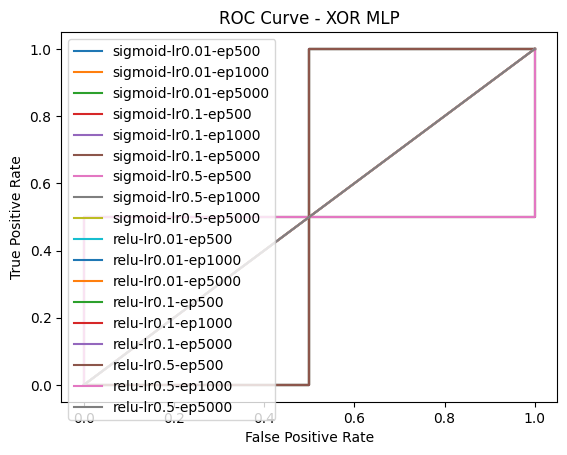

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
def relu(x):
    return np.maximum(0, x)
def relu_derivative(x):
    return (x > 0).astype(float)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)
def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-10)
def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-10)
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r + 1e-10)

def roc_curve(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    tpr_list = []
    fpr_list = []
    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tpr = tp / (tp + fn + 1e-10)
        fpr = fp / (fp + tn + 1e-10)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return fpr_list, tpr_list

def train_mlp(X, y, hidden_activation="sigmoid", lr=0.1, epochs=1000):
    np.random.seed(42)
    W1 = np.random.randn(2, 2)
    b1 = np.zeros((1, 2))
    W2 = np.random.randn(2, 1)
    b2 = np.zeros((1, 1))

    act = sigmoid if hidden_activation == "sigmoid" else relu
    act_deriv = sigmoid_derivative if hidden_activation == "sigmoid" else relu_derivative

    for _ in range(epochs):
        z1 = X @ W1 + b1
        a1 = act(z1)
        z2 = a1 @ W2 + b2
        a2 = sigmoid(z2)
        error = y - a2
        d_a2 = error * sigmoid_derivative(a2)
        d_a1 = d_a2 @ W2.T * act_deriv(a1)

        W2 += lr * (a1.T @ d_a2)
        b2 += lr * np.sum(d_a2, axis=0, keepdims=True)
        W1 += lr * (X.T @ d_a1)
        b1 += lr * np.sum(d_a1, axis=0, keepdims=True)

    scores = sigmoid(X @ W1 @ W2 + b1 @ W2 + b2)
    preds = (scores >= 0.5).astype(int)
    return preds, scores

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

learning_rates = [0.01, 0.1, 0.5]
epochs_list = [500, 1000, 5000]
activations = ["sigmoid", "relu"]

for act in activations:
    for lr in learning_rates:
        for ep in epochs_list:
            preds, scores = train_mlp(X, y, hidden_activation=act, lr=lr, epochs=ep)
            acc = accuracy(y, preds)
            p = precision(y, preds)
            r = recall(y, preds)
            f1 = f1_score(y, preds)
            print(f"Act={act}, LR={lr}, Epochs={ep} => Acc={acc:.2f}, Prec={p:.2f}, Recall={r:.2f}, F1={f1:.2f}")
            fpr, tpr = roc_curve(y, scores)
            plt.plot(fpr, tpr, label=f"{act}-lr{lr}-ep{ep}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XOR MLP")
plt.legend()
plt.show()
